<a href="https://colab.research.google.com/github/Junuthulakavya/StatisticCrafting/blob/main/StatisticCrafting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaptive Statistical Imputation (ASI)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import skew, entropy

def adaptive_imputation(data, k_neighbors=5):
    print("\n🔍 Adaptive Statistical Imputation...\n")
    imputer = KNNImputer(n_neighbors=k_neighbors)

    for col in data.columns:
        missing_percentage = data[col].isnull().mean() * 100
        method = "No Imputation Needed"  # Default method if no missing values

        if missing_percentage > 0:
            if data[col].dtype in ['int64', 'float64']:
                col_skewness = skew(data[col].dropna())
                col_entropy = entropy(pd.value_counts(data[col].dropna(), normalize=True))

                if col_skewness > 1:
                    method = "Median Imputation (Skewed)"
                    data[col] = data[col].fillna(data[col].median())
                elif col_entropy < 1:
                    method = "KNN Imputation"
                    data[col] = imputer.fit_transform(data[[col]])
                else:
                    method = "Mean Imputation"
                    data[col] = data[col].fillna(data[col].mean())
            else:
                method = "Mode Imputation (Categorical)"
                data[col] = data[col].fillna(data[col].mode()[0])

        print(f"✔ Column: {col} | Missing: {missing_percentage:.2f}% | Method: {method}")

    return data

# Load dataset
file_path = input("Enter dataset path (CSV file): ")
data = pd.read_csv(file_path)

# Perform adaptive imputation
updated_data = adaptive_imputation(data)

# Save the cleaned dataset
output_path = file_path.replace(".csv", "_cleaned.csv")
updated_data.to_csv(output_path, index=False)
print(f"\n✅ Imputation Completed! Cleaned dataset saved as: {output_path}")


Enter dataset path (CSV file): /content/framingham.csv

🔍 Adaptive Statistical Imputation...

✔ Column: male | Missing: 0.00% | Method: No Imputation Needed
✔ Column: age | Missing: 0.00% | Method: No Imputation Needed
✔ Column: education | Missing: 2.48% | Method: Mean Imputation
✔ Column: currentSmoker | Missing: 0.00% | Method: No Imputation Needed
✔ Column: cigsPerDay | Missing: 0.68% | Method: Median Imputation (Skewed)
✔ Column: BPMeds | Missing: 1.25% | Method: Median Imputation (Skewed)
✔ Column: prevalentStroke | Missing: 0.00% | Method: No Imputation Needed
✔ Column: prevalentHyp | Missing: 0.00% | Method: No Imputation Needed
✔ Column: diabetes | Missing: 0.00% | Method: No Imputation Needed
✔ Column: totChol | Missing: 1.18% | Method: Mean Imputation
✔ Column: sysBP | Missing: 0.00% | Method: No Imputation Needed
✔ Column: diaBP | Missing: 0.00% | Method: No Imputation Needed
✔ Column: BMI | Missing: 0.45% | Method: Mean Imputation
✔ Column: heartRate | Missing: 0.02% | Met

<ipython-input-1-894d7e21c20e>:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  col_entropy = entropy(pd.value_counts(data[col].dropna(), normalize=True))


#Information-Theoretic Feature Selection

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy


# Suppress sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)

def feature_selection(data, target_col):
    print("\n📊 Information-Theoretic Feature Selection...\n")

    selected_features = []

    # Drop categorical columns except the target
    numeric_data = data.select_dtypes(include=['number'])

    # Handle categorical target by encoding it
    if data[target_col].dtype == 'object':
        print(f"🔄 Encoding categorical target: {target_col}")
        le = LabelEncoder()
        data[target_col] = le.fit_transform(data[target_col])  # Convert target to numerical

    if target_col not in numeric_data.columns:
        numeric_data[target_col] = data[target_col]  # Ensure target is present

    X = numeric_data.drop(columns=[target_col])
    y = numeric_data[target_col]

    # Ensure the target is treated as a discrete variable
    discrete_target = y.astype(int)

    for col in X.columns:
        entropy_value = entropy(pd.Series(X[col]).value_counts())  # Calculate entropy
        mi = mutual_info_classif(X[[col]], discrete_target, discrete_features=True)[0]  # Mutual Info

        if entropy_value > 0.5 and mi > 0.01:  # Adaptive threshold
            selected_features.append(col)
            print(f"✔ Feature: {col} | Entropy: {entropy_value:.2f} | MI: {mi:.4f} ✅ Selected")
        else:
            print(f"❌ Feature: {col} | Entropy: {entropy_value:.2f} | MI: {mi:.4f} Removed")

    return data[selected_features + [target_col]]

# Example usage
file_path = input("Enter dataset path (CSV file): ")
data = pd.read_csv(file_path)

target = input("Enter target column name: ")

# Perform feature selection
filtered_data = feature_selection(data, target)

# Save cleaned dataset
output_path = file_path.replace(".csv", "_selected_features.csv")
filtered_data.to_csv(output_path, index=False)

print(f"\n✅ Feature Selection Completed! Dataset saved as: {output_path}")


Enter dataset path (CSV file): /content/framingham_cleaned.csv
Enter target column name: TenYearCHD

📊 Information-Theoretic Feature Selection...

❌ Feature: male | Entropy: 0.68 | MI: 0.0039 Removed
✔ Feature: age | Entropy: 3.48 | MI: 0.0293 ✅ Selected
❌ Feature: education | Entropy: 1.36 | MI: 0.0038 Removed
❌ Feature: currentSmoker | Entropy: 0.69 | MI: 0.0002 Removed
❌ Feature: cigsPerDay | Entropy: 1.83 | MI: 0.0050 Removed
❌ Feature: BPMeds | Entropy: 0.13 | MI: 0.0030 Removed
❌ Feature: prevalentStroke | Entropy: 0.04 | MI: 0.0014 Removed
✔ Feature: prevalentHyp | Entropy: 0.62 | MI: 0.0148 ✅ Selected
❌ Feature: diabetes | Entropy: 0.12 | MI: 0.0037 Removed
✔ Feature: totChol | Entropy: 5.08 | MI: 0.0379 ✅ Selected
✔ Feature: sysBP | Entropy: 4.82 | MI: 0.0550 ✅ Selected
✔ Feature: diaBP | Entropy: 4.22 | MI: 0.0320 ✅ Selected
✔ Feature: BMI | Entropy: 6.92 | MI: 0.1696 ✅ Selected
❌ Feature: heartRate | Entropy: 3.43 | MI: 0.0088 Removed
✔ Feature: glucose | Entropy: 3.82 | MI:

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


#Robust Outlier Detection using Tukey’s Fence & Fractal Analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers(data, target_column=None):
    """
    Robust outlier detection using IQR + LOF.
    Replaces outliers with NaN for future imputation.

    Parameters:
        data (pd.DataFrame): Input dataset
        target_column (str): Column to exclude (e.g., classification target)

    Returns:
        pd.DataFrame: Dataset with outliers replaced by NaN
    """
    print("\n🚀 Robust Outlier Detection using IQR and LOF...\n")
    data = data.copy()  # Avoid modifying original

    for col in data.columns:
        if target_column and col == target_column:
            print(f"⏭ Skipping target column: {col}")
            continue

        if data[col].dtype in ['int64', 'float64']:
            col_data = data[col].dropna()

            # IQR bounds
            Q1, Q3 = np.percentile(col_data, [25, 75])
            iqr_value = iqr(col_data)
            lower_bound, upper_bound = Q1 - 1.5 * iqr_value, Q3 + 1.5 * iqr_value

            iqr_outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

            # LOF applied to non-null values
            non_null_idx = data[col].dropna().index
            lof_model = LocalOutlierFactor(n_neighbors=15)
            lof_result = lof_model.fit_predict(data.loc[non_null_idx, [col]])
            lof_outliers = pd.Series(lof_result == -1, index=non_null_idx)

            # Confirm both IQR + LOF
            confirmed_outliers = iqr_outliers & lof_outliers.reindex(data.index, fill_value=False)
            data.loc[confirmed_outliers, col] = np.nan

            print(f"✔ Column: {col} | Final Outliers Replaced: {confirmed_outliers.sum()}")

    return data



# Example usage
file_path = input("Enter dataset path (CSV file): ")
data = pd.read_csv(file_path)
cleaned_data = detect_outliers(data)


Enter dataset path (CSV file): /content/framingham_cleaned.csv

🚀 Robust Outlier Detection using IQR and LOF...

✔ Column: male | Final Outliers Replaced: 0
✔ Column: age | Final Outliers Replaced: 0
✔ Column: education | Final Outliers Replaced: 0
✔ Column: currentSmoker | Final Outliers Replaced: 0
✔ Column: cigsPerDay | Final Outliers Replaced: 0
✔ Column: BPMeds | Final Outliers Replaced: 0
✔ Column: prevalentStroke | Final Outliers Replaced: 0
✔ Column: prevalentHyp | Final Outliers Replaced: 0
✔ Column: diabetes | Final Outliers Replaced: 0
✔ Column: totChol | Final Outliers Replaced: 12
✔ Column: sysBP | Final Outliers Replaced: 9
✔ Column: diaBP | Final Outliers Replaced: 7
✔ Column: BMI | Final Outliers Replaced: 9
✔ Column: heartRate | Final Outliers Replaced: 22
✔ Column: glucose | Final Outliers Replaced: 8
✔ Column: TenYearCHD | Final Outliers Replaced: 0


# Quantum Statistics for Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder

def quantum_feature_selection(data, target_col):
    print("\n⚛ Quantum Feature Selection...\n")

    # Encode categorical target variable
    if data[target_col].dtype == 'object':
        print(f"🔄 Encoding categorical target: {target_col}")
        le = LabelEncoder()
        data[target_col] = le.fit_transform(data[target_col])

    # Drop non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    if target_col not in numeric_data.columns:
        numeric_data[target_col] = data[target_col]  # Ensure target is present

    X = numeric_data.drop(columns=[target_col])
    y = numeric_data[target_col]

    entanglement_scores = {}

    for col in X.columns:
        col_entropy = entropy(pd.Series(X[col]).value_counts())  # Shannon Entropy

        try:
            mutual_info = np.corrcoef(X[col].astype(float), y.astype(float))[0, 1]  # Correlation as proxy
        except Exception:
            mutual_info = 0  # Handle NaN cases safely

        entanglement_scores[col] = col_entropy * abs(mutual_info)  # Quantum-inspired metric

    # Select top features based on quantum-inspired scores
    selected_features = sorted(entanglement_scores, key=entanglement_scores.get, reverse=True)[:int(len(X.columns) * 0.7)]

    print("✔ Selected Features:", selected_features)
    return data[selected_features + [target_col]]

# Example usage
file_path = input("Enter dataset path (CSV file): ")
data = pd.read_csv(file_path)
target = input("Enter target column name: ")

# Perform quantum feature selection
quantum_filtered_data = quantum_feature_selection(data, target)

# Save the cleaned dataset
output_path = file_path.replace(".csv", "_quantum_selected.csv")
quantum_filtered_data.to_csv(output_path, index=False)

print(f"\n✅ Feature Selection Completed! Dataset saved as: {output_path}")


Enter dataset path (CSV file): /content/framingham_cleaned.csv
Enter target column name: TenYearCHD

⚛ Quantum Feature Selection...

✔ Selected Features: ['sysBP', 'age', 'diaBP', 'BMI', 'glucose', 'totChol', 'prevalentHyp', 'cigsPerDay', 'heartRate', 'education']

✅ Feature Selection Completed! Dataset saved as: /content/framingham_cleaned_quantum_selected.csv


#Dynamic Weight Adjustment for Imbalanced Datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

def dynamic_class_weights(y):
    weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    return {cls: weight for cls, weight in zip(np.unique(y), weights)}

def preprocess_features(data, target_col):
    """ Converts categorical columns to numerical and handles missing values. """
    X = data.drop(columns=[target_col])

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Label Encoding for categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding

    # Fill missing values (if any)
    X = X.fillna(X.median(numeric_only=True))

    return X

# Example usage
file_path = input("Enter dataset path (CSV file): ")
data = pd.read_csv(file_path)
target = input("Enter target column name: ")

# Encode target variable if categorical
if data[target].dtype == 'object':
    print(f"🔄 Encoding categorical target: {target}")
    le = LabelEncoder()
    data[target] = le.fit_transform(data[target])

# Process feature set
X = preprocess_features(data, target)
y = data[target]

# Compute class weights
weights = dynamic_class_weights(y)

# Train model
clf = RandomForestClassifier(class_weight=weights, random_state=42)
clf.fit(X, y)

print("\n🚀 Model trained successfully with dynamic class weights:", weights)


Enter dataset path (CSV file): /content/mnist_flattened_cleaned_selected_features.csv
Enter target column name: label

🚀 Model trained successfully with dynamic class weights: {np.int64(0): np.float64(1.0130001688333614), np.int64(1): np.float64(0.8899436369029962), np.int64(2): np.float64(1.0070493454179255), np.int64(3): np.float64(0.978633175664655), np.int64(4): np.float64(1.0270455323519343), np.int64(5): np.float64(1.1068068622025458), np.int64(6): np.float64(1.013856032443393), np.int64(7): np.float64(0.9577015163607342), np.int64(8): np.float64(1.025465732353444), np.int64(9): np.float64(1.0085728693898135)}


#INTERACTIVE HEATMAP

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def interactive_heatmap_with_outliers(df, index_column=None):
    """
    Generate an interactive heatmap with outlier detection for any dataset.

    Args:
        df (pd.DataFrame): Input dataset with numeric features.
        index_column (str): Optional column to set as the index. If None, the default index is used.

    Returns:
        None: Displays the heatmap in the browser.
    """
    # Ensure input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")

    # Dynamically set index column if provided
    if index_column:
        if index_column not in df.columns:
            raise ValueError(f"Index column '{index_column}' not found in the dataset.")
        else:
            df.set_index(index_column, inplace=True)

    # Select only numeric columns for the heatmap
    heatmap_data = df.select_dtypes(include=["number"])
    if heatmap_data.empty:
        raise ValueError("The dataset contains no numeric columns to create a heatmap.")

    # Generate the heatmap
    fig = px.imshow(
        heatmap_data,
        labels=dict(x="Features", y="Samples", color="Value"),
        x=heatmap_data.columns,
        y=heatmap_data.index,
        color_continuous_scale="RdYlGn",
        title="Interactive Heatmap with Outlier Detection",
    )

    # Highlight outliers using IQR method
    outlier_points = []  # Store outliers for a single trace
    for column in heatmap_data.columns:
        col_values = heatmap_data[column]
        q1, q3 = col_values.quantile(0.25), col_values.quantile(0.75)
        iqr = q3 - q1
        outliers = (col_values < (q1 - 1.5 * iqr)) | (col_values > (q3 + 1.5 * iqr))

        # Append outlier coordinates to the list
        for idx in heatmap_data.index[outliers]:
            outlier_points.append((column, idx))

    if outlier_points:
        x_vals, y_vals = zip(*outlier_points)
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode="markers",
                marker=dict(size=10, color="red", symbol="x"),
                name="Outlier",
            )
        )

    fig.show()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/framingham_cleaned.csv")
df = pd.DataFrame(data)


# Call the heatmap function (ensure the heatmap function is defined)
interactive_heatmap_with_outliers(df)


#FEATURE ENGINEERING

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_with_selection(data, target_column=None, include_categorical=False, variance_threshold=0.01):
    """
    Enhanced Feature Engineering:
    - Generates new statistical features (mean, std, skew, kurtosis).
    - Expands interactions (multiplication, division, sum, difference).
    - Handles multicollinearity using VIF.
    - Selects features dynamically based on Mutual Information (MI).
    """
    if data.empty:
        raise ValueError("Input dataset is empty.")

    if target_column and target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' is not in the dataset.")

    # Separate numeric and categorical columns
    numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
    non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()

    if target_column in non_numeric_columns:
        non_numeric_columns.remove(target_column)

    # DataFrame to store engineered features
    engineered_features = pd.DataFrame(index=data.index)

    # Generate statistical moments for numeric features
    for column in numeric_columns:
        if column != target_column:
            engineered_features[f"{column}_mean"] = data[column].mean()
            engineered_features[f"{column}_std"] = data[column].std()
            engineered_features[f"{column}_skew"] = skew(data[column].dropna())
            engineered_features[f"{column}_kurtosis"] = kurtosis(data[column].dropna())

    # Generate pairwise interaction terms (Multiplication, Division, Sum, Difference)
    for i, col1 in enumerate(numeric_columns):
        for col2 in numeric_columns[i+1:]:
            if col1 != target_column and col2 != target_column:
                engineered_features[f"{col1}_{col2}_mult"] = data[col1] * data[col2]
                engineered_features[f"{col1}_{col2}_div"] = data[col1] / (data[col2] + 1e-5)  # Avoid division by zero
                engineered_features[f"{col1}_{col2}_sum"] = data[col1] + data[col2]
                engineered_features[f"{col1}_{col2}_diff"] = data[col1] - data[col2]

    # Encode categorical features if required
    if include_categorical and non_numeric_columns:
        encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_columns), index=data.index)
        engineered_features = pd.concat([engineered_features, encoded_df], axis=1)

    # Scale features
    scaler = MinMaxScaler()
    engineered_features = pd.DataFrame(scaler.fit_transform(engineered_features.fillna(0)), columns=engineered_features.columns)

    # Remove features with low variance
    var_selector = VarianceThreshold(threshold=variance_threshold)
    filtered_features = var_selector.fit_transform(engineered_features)
    selected_feature_names = engineered_features.columns[var_selector.get_support()]
    engineered_features = pd.DataFrame(filtered_features, columns=selected_feature_names)

    # Handle multicollinearity using Variance Inflation Factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = engineered_features.columns
    vif_data["VIF"] = [variance_inflation_factor(engineered_features.values, i) for i in range(engineered_features.shape[1])]
    engineered_features = engineered_features[vif_data["VIF"] < 5]  # Keep only low-VIF features

    # Feature selection using mutual information
    if target_column:
        mi_scores = mutual_info_regression(engineered_features.fillna(0), data[target_column])
        threshold = np.percentile(mi_scores, 75)  # Select top 25% of most informative features
        selected_features = [feat for feat, score in zip(engineered_features.columns, mi_scores) if score >= threshold]
        engineered_features = engineered_features[selected_features]

    # Concatenate with original dataset
    final_dataset = pd.concat([data, engineered_features], axis=1)
    return final_dataset


In [ ]:
pip install medmnist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256

Dataset Shape (Subset): (10, 28, 28, 1)


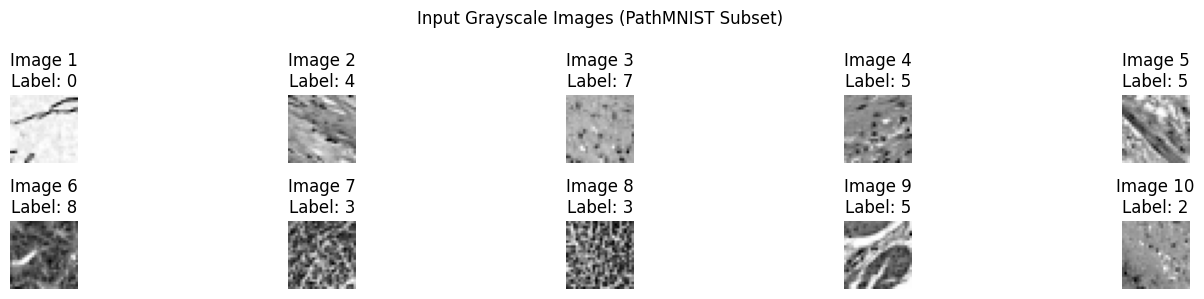

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 482ms/step - loss: 209.5059
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step - loss: 40.4734
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - loss: 23.1710
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step - loss: 17.2790
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - loss: 17.2048
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 20.1488
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 509ms/step - loss: 28.7992
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - loss: 19.0498
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - loss: 19.4346
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - loss: 16.5115
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 566ms/step - loss: 18.5356
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 585ms/step - loss: 21.1698
Epoch 13/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - loss: 12.5293
Epoch 14/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step - loss: 12.0258
Epoch 15/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - loss: 13.3169


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


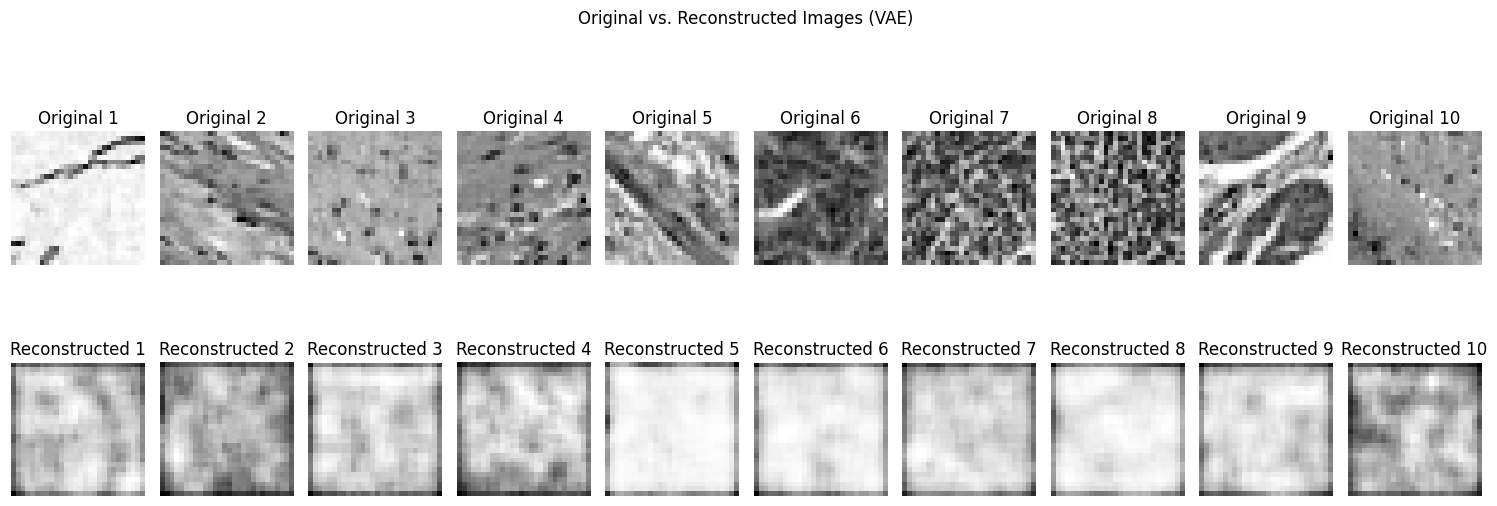

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced Feature Shape: (10, 9)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
<ipython-input-11-865d27f568f5>:173: RuntimeWarning: invalid value encountered in divide
  probs_spectral = probs_spectral / probs_spectral.sum(axis=1, keepdims=True)


Silhouette Weights: {'K-Means': np.float64(0.21338086458522854), 'BGMM': np.float64(0.21338086458522854), 'OPTICS': np.float64(0.5732382706680039), 'Spectral': np.float64(0.0)}
🚀 Enhanced Hybrid Consensus Clustering!


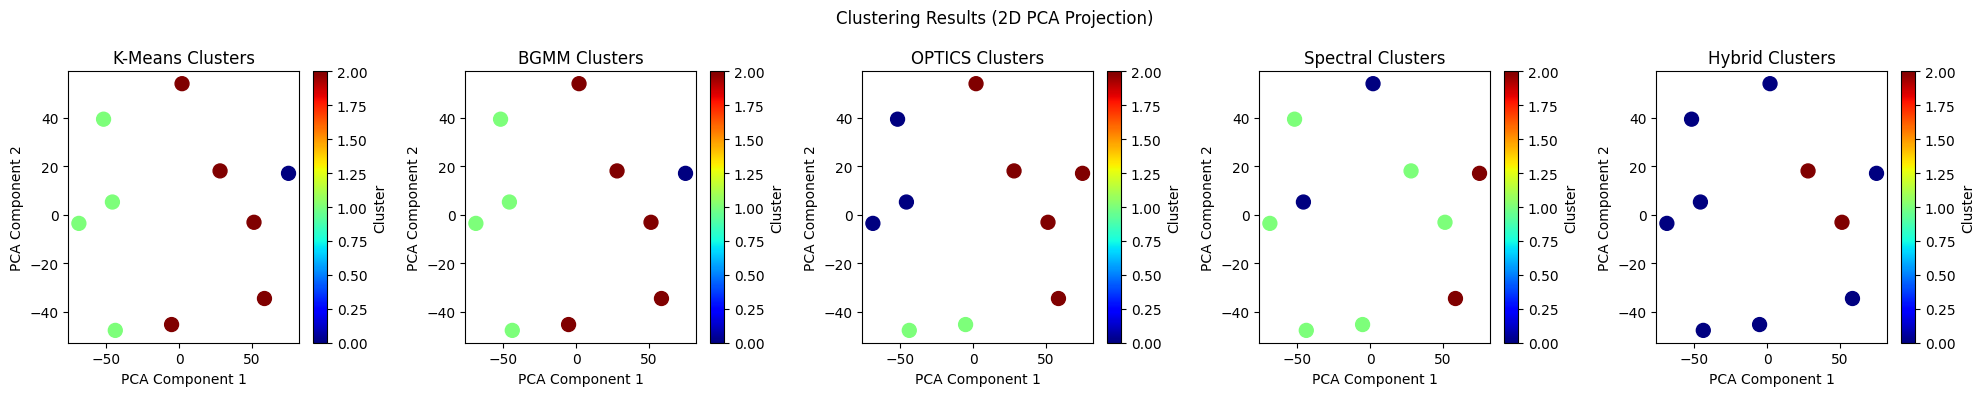

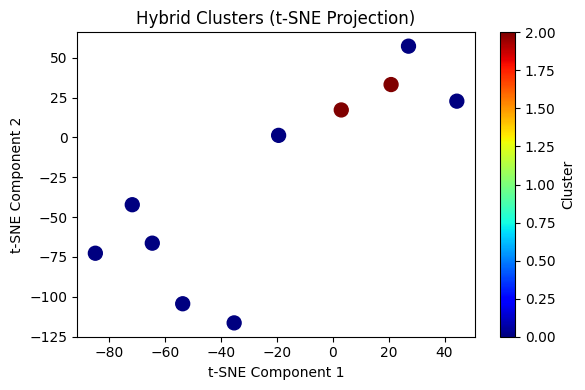


🔹 Final Accuracy Comparison Table 🔹
     Method  Silhouette Score  Davies-Bouldin Index  Adjusted Rand Index
0   K-Means          0.132092              0.883146            -0.049223
1      BGMM          0.132092              0.883146            -0.049223
2    OPTICS          0.354861              0.734485            -0.160458
3  Spectral         -0.063297              1.910713            -0.056860
4    Hybrid          0.024619              1.563964             0.102155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import medmnist
from medmnist import PathMNIST
import torch
from torchvision import transforms
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, BatchNormalization, Lambda, Layer
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, OPTICS, SpectralClustering
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import umap
from scipy.stats import entropy

# Install required packages
!pip install medmnist umap-learn

# **Step 1: Load & Process Small Subset (10 Images)**
data_flag = 'pathmnist'
download = True

train_dataset = PathMNIST(split='train', transform=transforms.ToTensor(), download=download)
train_images = train_dataset.imgs[:10]
train_labels = train_dataset.labels[:10].flatten()

# Convert to grayscale & Normalize
train_images_gray = np.mean(train_images, axis=-1)
train_images_gray = train_images_gray.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"Dataset Shape (Subset): {train_images_gray.shape}")

# Visualize Input Images
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
    plt.title(f'Image {i+1}\nLabel: {train_labels[i]}')
    plt.axis('off')
plt.suptitle('Input Grayscale Images (PathMNIST Subset)')
plt.tight_layout()
plt.show()

# **Step 2: Variational Autoencoder with Contrastive + KL Loss**
class KLDivergenceLayer(Layer):
    def __init__(self, kl_weight=0.1, **kwargs):
        super(KLDivergenceLayer, self).__init__(**kwargs)
        self.kl_weight = kl_weight

    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        self.add_loss(self.kl_weight * kl_loss)
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
        z_sample = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        return z_sample

    def get_config(self):
        config = super(KLDivergenceLayer, self).get_config()
        config.update({"kl_weight": self.kl_weight})
        return config

# Build VAE
input_layer = tf.keras.Input(shape=(28, 28, 1))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Flatten()(x)

z_mean = Dense(1024, activation='linear')(encoded)
z_log_var = Dense(1024, activation='linear')(encoded)

z_sample = KLDivergenceLayer(kl_weight=0.1)([z_mean, z_log_var])

x = Dense(7 * 7 * 128, activation='relu')(z_sample)
x = Reshape((7, 7, 128))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

vae = Model(input_layer, decoded)

def contrastive_loss(y_true, y_pred):
    margin = 1.0
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(y_pred)
    pairwise_dist = tf.keras.backend.sum(tf.keras.backend.square(y_pred - y_true), axis=-1)
    return tf.keras.backend.mean(y_true * pairwise_dist + (1 - y_true) * tf.keras.backend.maximum(margin - pairwise_dist, 0))

vae.compile(optimizer='adam', loss=contrastive_loss)

# Train VAE
vae.fit(train_images_gray, train_images_gray, epochs=15, batch_size=4, shuffle=True, verbose=1)

# Visualize Reconstructed Images
reconstructions = vae.predict(train_images_gray)
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructions[i].squeeze(), cmap='gray')
    plt.title(f'Reconstructed {i+1}')
    plt.axis('off')
plt.suptitle('Original vs. Reconstructed Images (VAE)')
plt.tight_layout()
plt.show()

# Feature Extraction
encoder = Model(input_layer, z_sample)
features = encoder.predict(train_images_gray)

# Standardize Features
features_scaled = StandardScaler().fit_transform(features)

# **Step 3: Hybrid Feature Fusion with PCA + t-SNE + UMAP**
pca = PCA(n_components=5, random_state=42)
features_pca = pca.fit_transform(features_scaled)

tsne_perplexity = min(3, len(features_scaled) - 1)
features_tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42).fit_transform(features_scaled)

n_neighbors = max(2, len(features_scaled) // 3)
features_umap = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42).fit_transform(features_scaled)

features_reduced = np.hstack((features_pca, features_tsne, features_umap))

print(f"Reduced Feature Shape: {features_reduced.shape}")

# **Step 4: Clustering Algorithms**
n_clusters = 3
bgmm = BayesianGaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42).fit(features_reduced)
labels_bgmm = bgmm.predict(features_reduced)
probs_bgmm = bgmm.predict_proba(features_reduced)

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(features_reduced)
labels_kmeans = kmeans.predict(features_reduced)
distances_kmeans = np.linalg.norm(features_reduced[:, None] - kmeans.cluster_centers_, axis=2)
probs_kmeans = np.exp(-distances_kmeans) / np.exp(-distances_kmeans).sum(axis=1, keepdims=True)

optics = OPTICS(min_samples=2).fit(features_reduced)
labels_optics = optics.labels_
# Use KMeans as fallback for OPTICS soft assignments to match n_clusters
if np.unique(labels_optics).size <= 1 or -1 in labels_optics:
    fallback_kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(features_reduced)
    labels_optics = fallback_kmeans.predict(features_reduced)
    distances_optics = np.linalg.norm(features_reduced[:, None] - fallback_kmeans.cluster_centers_, axis=2)
    probs_optics = np.exp(-distances_optics) / np.exp(-distances_optics).sum(axis=1, keepdims=True)
else:
    # Approximate soft assignments for OPTICS
    probs_optics = np.zeros((len(features_reduced), n_clusters))
    for i, label in enumerate(labels_optics):
        if label != -1:
            probs_optics[i, label % n_clusters] = 1.0
        else:
            probs_optics[i, :] = 1.0 / n_clusters

spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42).fit(features_reduced)
labels_spectral = spectral.labels_
affinity = spectral.affinity_matrix_
probs_spectral = affinity / affinity.sum(axis=1, keepdims=True)
if probs_spectral.shape[1] > n_clusters:
    probs_spectral = probs_spectral[:, :n_clusters]
    probs_spectral = probs_spectral / probs_spectral.sum(axis=1, keepdims=True)

# **Step 5: Enhanced Hybrid Method with Weighted Consensus**
silhouette_scores = {
    "K-Means": silhouette_score(features_reduced, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else -1,
    "BGMM": silhouette_score(features_reduced, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else -1,
    "OPTICS": silhouette_score(features_reduced, labels_optics) if len(np.unique(labels_optics)) > 1 else -1,
    "Spectral": silhouette_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1
}

weights = np.array([max(score, 0) for score in silhouette_scores.values()])
weights = weights / (weights.sum() + 1e-10)

probs_combined = (
    weights[0] * probs_kmeans +
    weights[1] * probs_bgmm +
    weights[2] * probs_optics +
    weights[3] * probs_spectral
)
final_labels = np.argmax(probs_combined, axis=1)

print(f"Silhouette Weights: {dict(zip(silhouette_scores.keys(), weights))}")
print("🚀 Enhanced Hybrid Consensus Clustering!")

# **Step 6: Visualize Clustering Results**
pca_viz = PCA(n_components=2, random_state=42)
features_2d = pca_viz.fit_transform(features_reduced)

plt.figure(figsize=(20, 4))
for i, (labels, title) in enumerate([
    (labels_kmeans, 'K-Means'),
    (labels_bgmm, 'BGMM'),
    (labels_optics, 'OPTICS'),
    (labels_spectral, 'Spectral'),
    (final_labels, 'Hybrid')
], 1):
    plt.subplot(1, 5, i)
    plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet', s=100)
    plt.title(f'{title} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
plt.suptitle('Clustering Results (2D PCA Projection)')
plt.tight_layout()
plt.show()

features_tsne_hybrid = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42).fit_transform(features_reduced)
plt.figure(figsize=(6, 4))
plt.scatter(features_tsne_hybrid[:, 0], features_tsne_hybrid[:, 1], c=final_labels, cmap='jet', s=100)
plt.title('Hybrid Clusters (t-SNE Projection)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# **Step 7: Accuracy Comparisons**
hybrid_silhouette_score = silhouette_score(features_reduced, final_labels) if len(np.unique(final_labels)) > 1 else -1
hybrid_davies_bouldin_score = davies_bouldin_score(features_reduced, final_labels) if len(np.unique(final_labels)) > 1 else float('inf')
ari_hybrid = adjusted_rand_score(train_labels, final_labels) if len(np.unique(final_labels)) > 1 else -1

df_comparison = pd.DataFrame({
    "Method": ["K-Means", "BGMM", "OPTICS", "Spectral", "Hybrid"],
    "Silhouette Score": [
        silhouette_scores["K-Means"],
        silhouette_scores["BGMM"],
        silhouette_scores["OPTICS"],
        silhouette_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1,
        hybrid_silhouette_score
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(features_reduced, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else float('inf'),
        davies_bouldin_score(features_reduced, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else float('inf'),
        davies_bouldin_score(features_reduced, labels_optics) if len(np.unique(labels_optics)) > 1 else float('inf'),
        davies_bouldin_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else float('inf'),
        hybrid_davies_bouldin_score
    ],
    "Adjusted Rand Index": [
        adjusted_rand_score(train_labels, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else -1,
        adjusted_rand_score(train_labels, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else -1,
        adjusted_rand_score(train_labels, labels_optics) if len(np.unique(labels_optics)) > 1 else -1,
        adjusted_rand_score(train_labels, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1,
        ari_hybrid
    ]
})

print("\n🔹 Final Accuracy Comparison Table 🔹")
print(df_comparison)

# Save visualizations
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
    plt.title(f'Image {i+1}\nLabel: {train_labels[i]}')
    plt.axis('off')
plt.suptitle('Input Grayscale Images (PathMNIST Subset)')
plt.tight_layout()
plt.savefig('/content/input_images.png')
plt.close()

plt.figure(figsize=(20, 4))
for i, (labels, title) in enumerate([
    (labels_kmeans, 'K-Means'),
    (labels_bgmm, 'BGMM'),
    (labels_optics, 'OPTICS'),
    (labels_spectral, 'Spectral'),
    (final_labels, 'Hybrid')
], 1):
    plt.subplot(1, 5, i)
    plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet', s=100)
    plt.title(f'{title} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
plt.suptitle('Clustering Results (2D PCA Projection)')
plt.tight_layout()
plt.savefig('/content/clustering_results.png')
plt.close()

plt.figure(figsize=(6, 4))
plt.scatter(features_tsne_hybrid[:, 0], features_tsne_hybrid[:, 1], c=final_labels, cmap='jet', s=100)
plt.title('Hybrid Clusters (t-SNE Projection)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.savefig('/content/hybrid_tsne.png')
plt.close()

# Download results
from google.colab import files
files.download('/content/input_images.png')
files.download('/content/clustering_results.png')
files.download('/content/hybrid_tsne.png')

In [ ]:
# Import libraries
import medmnist
from medmnist import PathMNIST
import torch
from torchvision import transforms
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, BatchNormalization, Lambda, Layer
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, OPTICS, SpectralClustering
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import umap
from scipy.stats import entropy

def run_clustering_pipeline():
    # Install required packages
    !pip install medmnist umap-learn

    # **Step 1: Load & Process Small Subset (10 Images)**
    data_flag = 'pathmnist'
    download = True

    train_dataset = PathMNIST(split='train', transform=transforms.ToTensor(), download=download)
    train_images = train_dataset.imgs[:10]
    train_labels = train_dataset.labels[:10].flatten()

    # Convert to grayscale & Normalize
    train_images_gray = np.mean(train_images, axis=-1)
    train_images_gray = train_images_gray.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    print(f"Dataset Shape (Subset): {train_images_gray.shape}")

    # Visualize Input Images
    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
        plt.title(f'Image {i+1}\nLabel: {train_labels[i]}')
        plt.axis('off')
    plt.suptitle('Input Grayscale Images (PathMNIST Subset)')
    plt.tight_layout()
    plt.show()

    # **Step 2: Variational Autoencoder with Contrastive + KL Loss**
    class KLDivergenceLayer(Layer):
        def __init__(self, kl_weight=0.1, **kwargs):
            super(KLDivergenceLayer, self).__init__(**kwargs)
            self.kl_weight = kl_weight

        def call(self, inputs):
            z_mean, z_log_var = inputs
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
            self.add_loss(self.kl_weight * kl_loss)
            epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
            z_sample = z_mean + tf.exp(0.5 * z_log_var) * epsilon
            return z_sample

        def get_config(self):
            config = super(KLDivergenceLayer, self).get_config()
            config.update({"kl_weight": self.kl_weight})
            return config

    # Build VAE
    input_layer = tf.keras.Input(shape=(28, 28, 1))
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Flatten()(x)

    z_mean = Dense(1024, activation='linear')(encoded)
    z_log_var = Dense(1024, activation='linear')(encoded)

    z_sample = KLDivergenceLayer(kl_weight=0.1)([z_mean, z_log_var])

    x = Dense(7 * 7 * 128, activation='relu')(z_sample)
    x = Reshape((7, 7, 128))(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    vae = Model(input_layer, decoded)

    def contrastive_loss(y_true, y_pred):
        margin = 1.0
        y_true = tf.keras.backend.flatten(y_true)
        y_pred = tf.keras.backend.flatten(y_pred)
        pairwise_dist = tf.keras.backend.sum(tf.keras.backend.square(y_pred - y_true), axis=-1)
        return tf.keras.backend.mean(y_true * pairwise_dist + (1 - y_true) * tf.keras.backend.maximum(margin - pairwise_dist, 0))

    vae.compile(optimizer='adam', loss=contrastive_loss)

    # Train VAE
    vae.fit(train_images_gray, train_images_gray, epochs=15, batch_size=4, shuffle=True, verbose=1)

    # Visualize Reconstructed Images
    reconstructions = vae.predict(train_images_gray)
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
        plt.title(f'Original {i+1}')
        plt.axis('off')
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructions[i].squeeze(), cmap='gray')
        plt.title(f'Reconstructed {i+1}')
        plt.axis('off')
    plt.suptitle('Original vs. Reconstructed Images (VAE)')
    plt.tight_layout()
    plt.show()

    # Feature Extraction
    encoder = Model(input_layer, z_sample)
    features = encoder.predict(train_images_gray)

    # Standardize Features
    features_scaled = StandardScaler().fit_transform(features)

    # **Step 3: Hybrid Feature Fusion with PCA + t-SNE + UMAP**
    pca = PCA(n_components=5, random_state=42)
    features_pca = pca.fit_transform(features_scaled)

    tsne_perplexity = min(3, len(features_scaled) - 1)
    features_tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42).fit_transform(features_scaled)

    n_neighbors = max(2, len(features_scaled) // 3)
    features_umap = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42).fit_transform(features_scaled)

    features_reduced = np.hstack((features_pca, features_tsne, features_umap))

    print(f"Reduced Feature Shape: {features_reduced.shape}")

    # **Step 4: Clustering Algorithms**
    n_clusters = 3
    bgmm = BayesianGaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42).fit(features_reduced)
    labels_bgmm = bgmm.predict(features_reduced)
    probs_bgmm = bgmm.predict_proba(features_reduced)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(features_reduced)
    labels_kmeans = kmeans.predict(features_reduced)
    distances_kmeans = np.linalg.norm(features_reduced[:, None] - kmeans.cluster_centers_, axis=2)
    probs_kmeans = np.exp(-distances_kmeans) / np.exp(-distances_kmeans).sum(axis=1, keepdims=True)

    optics = OPTICS(min_samples=2).fit(features_reduced)
    labels_optics = optics.labels_
    if np.unique(labels_optics).size <= 1 or -1 in labels_optics:
        fallback_kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(features_reduced)
        labels_optics = fallback_kmeans.predict(features_reduced)
        distances_optics = np.linalg.norm(features_reduced[:, None] - fallback_kmeans.cluster_centers_, axis=2)
        probs_optics = np.exp(-distances_optics) / np.exp(-distances_optics).sum(axis=1, keepdims=True)
    else:
        probs_optics = np.zeros((len(features_reduced), n_clusters))
        for i, label in enumerate(labels_optics):
            if label != -1:
                probs_optics[i, label % n_clusters] = 1.0
            else:
                probs_optics[i, :] = 1.0 / n_clusters

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42).fit(features_reduced)
    labels_spectral = spectral.labels_
    affinity = spectral.affinity_matrix_
    probs_spectral = affinity / affinity.sum(axis=1, keepdims=True)
    if probs_spectral.shape[1] > n_clusters:
        probs_spectral = probs_spectral[:, :n_clusters]
        probs_spectral = probs_spectral / probs_spectral.sum(axis=1, keepdims=True)

    # **Step 5: Enhanced Hybrid Method with Weighted Consensus**
    silhouette_scores = {
        "K-Means": silhouette_score(features_reduced, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else -1,
        "BGMM": silhouette_score(features_reduced, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else -1,
        "OPTICS": silhouette_score(features_reduced, labels_optics) if len(np.unique(labels_optics)) > 1 else -1,
        "Spectral": silhouette_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1
    }

    weights = np.array([max(score, 0) for score in silhouette_scores.values()])
    weights = weights / (weights.sum() + 1e-10)

    probs_combined = (
        weights[0] * probs_kmeans +
        weights[1] * probs_bgmm +
        weights[2] * probs_optics +
        weights[3] * probs_spectral
    )
    final_labels = np.argmax(probs_combined, axis=1)

    print(f"Silhouette Weights: {dict(zip(silhouette_scores.keys(), weights))}")
    print("🚀 Enhanced Hybrid Consensus Clustering!")

    # **Step 6: Visualize Clustering Results**
    pca_viz = PCA(n_components=2, random_state=42)
    features_2d = pca_viz.fit_transform(features_reduced)

    plt.figure(figsize=(20, 4))
    for i, (labels, title) in enumerate([
        (labels_kmeans, 'K-Means'),
        (labels_bgmm, 'BGMM'),
        (labels_optics, 'OPTICS'),
        (labels_spectral, 'Spectral'),
        (final_labels, 'Hybrid')
    ], 1):
        plt.subplot(1, 5, i)
        plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet', s=100)
        plt.title(f'{title} Clusters')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster')
    plt.suptitle('Clustering Results (2D PCA Projection)')
    plt.tight_layout()
    plt.show()

    features_tsne_hybrid = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42).fit_transform(features_reduced)
    plt.figure(figsize=(6, 4))
    plt.scatter(features_tsne_hybrid[:, 0], features_tsne_hybrid[:, 1], c=final_labels, cmap='jet', s=100)
    plt.title('Hybrid Clusters (t-SNE Projection)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.tight_layout()
    plt.show()

    # **Step 7: Accuracy Comparisons**
    hybrid_silhouette_score = silhouette_score(features_reduced, final_labels) if len(np.unique(final_labels)) > 1 else -1
    hybrid_davies_bouldin_score = davies_bouldin_score(features_reduced, final_labels) if len(np.unique(final_labels)) > 1 else float('inf')
    ari_hybrid = adjusted_rand_score(train_labels, final_labels) if len(np.unique(final_labels)) > 1 else -1

    df_comparison = pd.DataFrame({
        "Method": ["K-Means", "BGMM", "OPTICS", "Spectral", "Hybrid"],
        "Silhouette Score": [
            silhouette_scores["K-Means"],
            silhouette_scores["BGMM"],
            silhouette_scores["OPTICS"],
            silhouette_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1,
            hybrid_silhouette_score
        ],
        "Davies-Bouldin Index": [
            davies_bouldin_score(features_reduced, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else float('inf'),
            davies_bouldin_score(features_reduced, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else float('inf'),
            davies_bouldin_score(features_reduced, labels_optics) if len(np.unique(labels_optics)) > 1 else float('inf'),
            davies_bouldin_score(features_reduced, labels_spectral) if len(np.unique(labels_spectral)) > 1 else float('inf'),
            hybrid_davies_bouldin_score
        ],
        "Adjusted Rand Index": [
            adjusted_rand_score(train_labels, labels_kmeans) if len(np.unique(labels_kmeans)) > 1 else -1,
            adjusted_rand_score(train_labels, labels_bgmm) if len(np.unique(labels_bgmm)) > 1 else -1,
            adjusted_rand_score(train_labels, labels_optics) if len(np.unique(labels_optics)) > 1 else -1,
            adjusted_rand_score(train_labels, labels_spectral) if len(np.unique(labels_spectral)) > 1 else -1,
            ari_hybrid
        ]
    })

    print("\n🔹 Final Accuracy Comparison Table 🔹")
    print(df_comparison)

    # Save visualizations
    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(train_images_gray[i].squeeze(), cmap='gray')
        plt.title(f'Image {i+1}\nLabel: {train_labels[i]}')
        plt.axis('off')
    plt.suptitle('Input Grayscale Images (PathMNIST Subset)')
    plt.tight_layout()
    plt.savefig('/content/input_images.png')
    plt.close()

    plt.figure(figsize=(20, 4))
    for i, (labels, title) in enumerate([
        (labels_kmeans, 'K-Means'),
        (labels_bgmm, 'BGMM'),
        (labels_optics, 'OPTICS'),
        (labels_spectral, 'Spectral'),
        (final_labels, 'Hybrid')
    ], 1):
        plt.subplot(1, 5, i)
        plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet', s=100)
        plt.title(f'{title} Clusters')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster')
    plt.suptitle('Clustering Results (2D PCA Projection)')
    plt.tight_layout()
    plt.savefig('/content/clustering_results.png')
    plt.close()

    plt.figure(figsize=(6, 4))
    plt.scatter(features_tsne_hybrid[:, 0], features_tsne_hybrid[:, 1], c=final_labels, cmap='jet', s=100)
    plt.title('Hybrid Clusters (t-SNE Projection)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.tight_layout()
    plt.savefig('/content/hybrid_tsne.png')
    plt.close()

    # Download results
    from google.colab import files
    files.download('/content/input_images.png')
    files.download('/content/clustering_results.png')
    files.download('/content/hybrid_tsne.png')

# To run the entire pipeline:
# run_clustering_pipeline()
